# Depth Profiles for OOI Pioneer NES AUV Across Shelf Deployments
* Taina Sanchez
* 2023-08-03
* Plotting netCDF data to create depth profiles by variable 
* Required input file(s): netcdf files provided through OOI’s JupyterHub or Raw Data Repository 

In [1]:
#notebook setup
!pip install xarray
!pip install netCDF4 

  Using cached xarray-2023.7.0-py3-none-any.whl (1.0 MB)
  Using cached netCDF4-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Using cached cftime-1.6.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# load in data file 
# this particular deployment in June 2019 starts offshore and heads north onto the shelf
# then east then returns south back offshore as displayed in OOI's Data Explorer
# https://dataexplorer.oceanobservatories.org/#platform/c646022c-ce04-5be8-8cd8-117da55121fa/v2?pid=187&tab=visualization  

# path in OOI's JupyterHub
DATA_FILE = '/home/jovyan/ooi/uncabled/CP05MOAS-A6264/R00011/PROFILES/cp_6264-20190618T1614.nc'

# path in OOI's Raw Data Repository note the #mode=bytes
# DATA_FILE = "https://rawdata-west.oceanobservatories.org/files/CP05MOAS-A6264/R00011/PROFILES/cp_6264-20190618T1614.nc#mode=bytes"
dataset = xr.open_dataset(DATA_FILE)

/opt/conda/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
#display variable names from metadata
#dataset.variables

In [5]:
# Extract relevant data
# flatten values to create 1-dimensional array
time = dataset['time'].values[0].flatten()
depth = dataset['depth'].values[0].flatten()
nitrate = dataset['dissolved_nitrate'].values[0].flatten()
chlorophyll = dataset['chlorophyll_a'].values[0].flatten()
salinity = dataset['salinity'].values[0].flatten()

/opt/conda/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


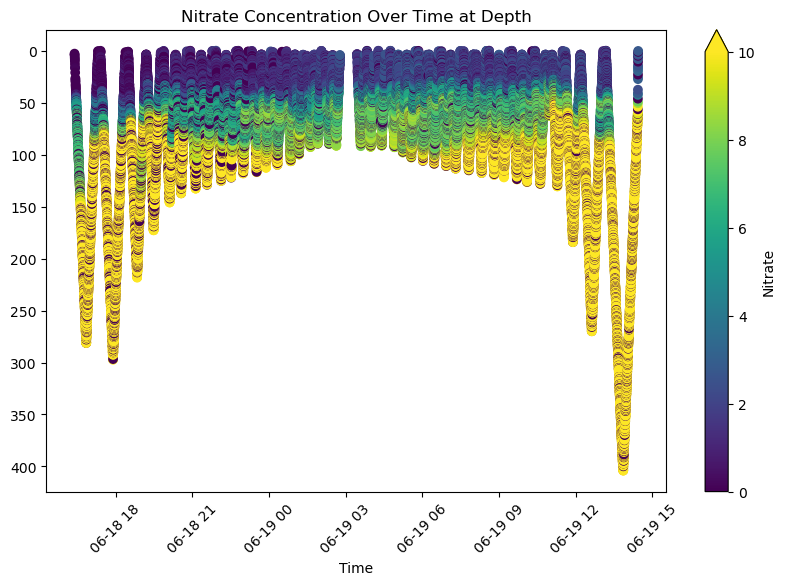

In [6]:
# Create scatter plot for a single plot
plt.figure(figsize=(10, 6))

sc = plt.scatter(time, depth, c=nitrate, cmap='viridis') #assign color map by variable
plt.colorbar(sc, label='Nitrate', extend='max') 
plt.clim(0,10)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.title('Nitrate Concentration Over Time at Depth')
plt.show()

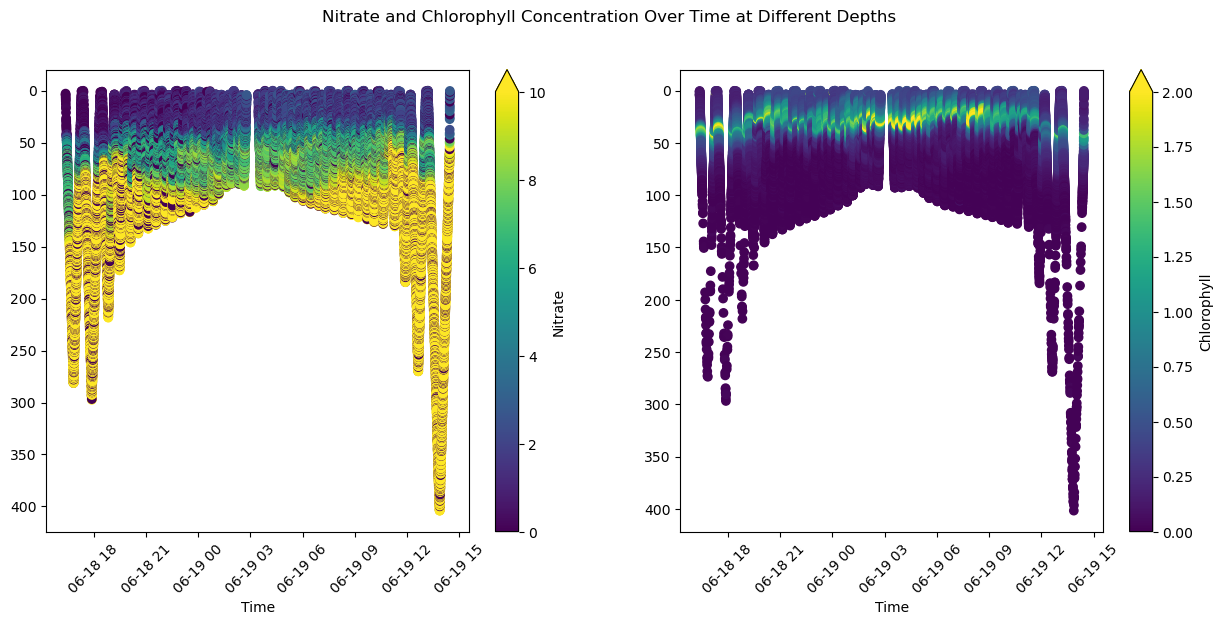

In [7]:
# Scatter plot for side-by-side plot 
plt.figure(figsize=(15, 6))

          
#nitrate plot
plt.subplot(1, 2, 1)
sc = plt.scatter(time, depth, c=nitrate, cmap='viridis')
plt.colorbar(sc, label='Nitrate', extend='max')
plt.clim(0,10)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

#chlorophyll plot
plt.subplot(1, 2, 2)
sc = plt.scatter(time, depth, c=chlorophyll, cmap='viridis')
plt.colorbar(sc, label='Chlorophyll', extend='max')
plt.clim(0,2)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.suptitle('Nitrate and Chlorophyll Concentration Over Time at Different Depths')
plt.show()

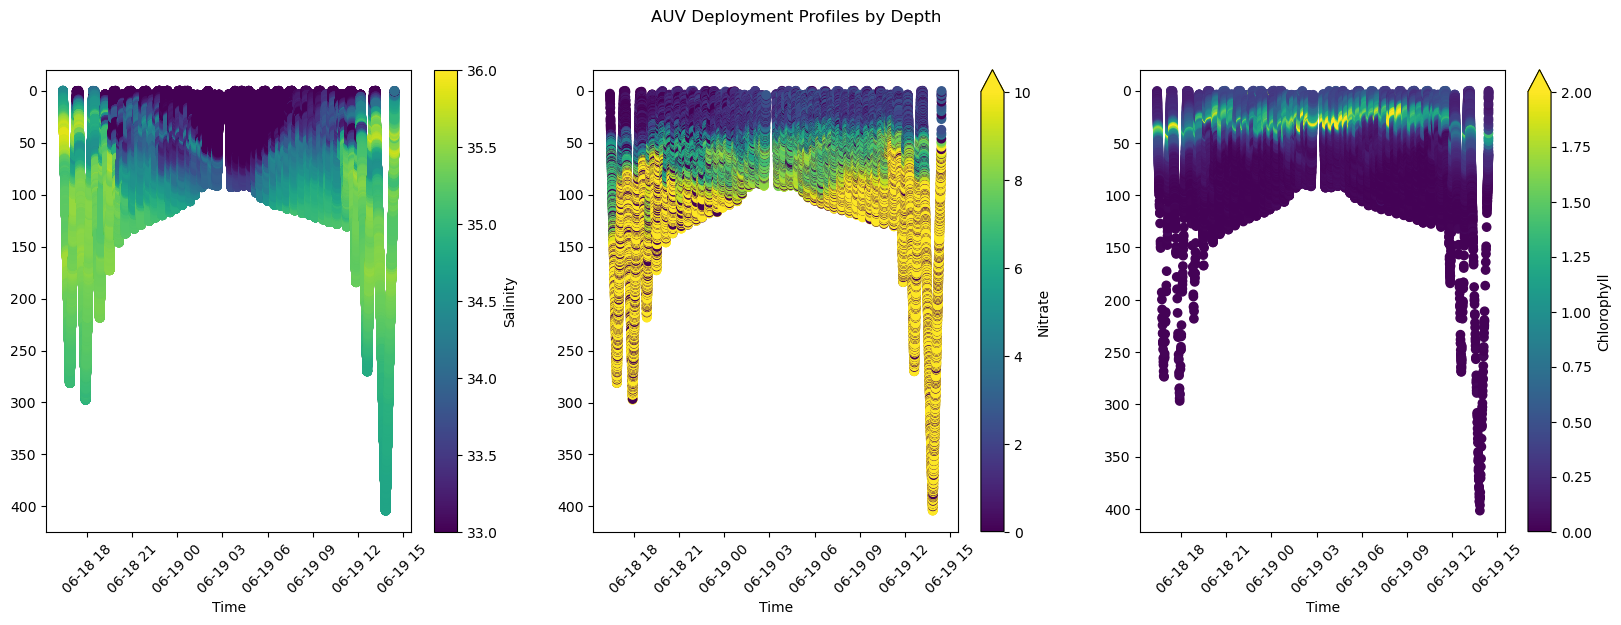

In [8]:
# 3-panel, side-by-side scatter plot
plt.figure(figsize=(20, 6))

#salinity plot
plt.subplot(1, 3, 1)
sc = plt.scatter(time, depth, c=salinity, cmap='viridis')
plt.colorbar(sc, label='Salinity')
plt.clim(33,36)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

#nitrate plot
plt.subplot(1, 3, 2)
sc = plt.scatter(time, depth, c=nitrate, cmap='viridis')
plt.colorbar(sc, label='Nitrate', extend='max')
plt.clim(0,10)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

#chlorophyll plot
plt.subplot(1, 3, 3)
sc = plt.scatter(time, depth, c=chlorophyll, cmap='viridis')
plt.colorbar(sc, label='Chlorophyll', extend='max')
plt.clim(0,2)
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)



plt.suptitle('AUV Deployment Profiles by Depth')
plt.show()